Comments on vocabulary
 dataset containts images of 28x28 grayscale pixels = 784 total pixels called features
 Each feature represents intensity from 0 to 255 (black)
 There are 24 classes - differnt signs

In [1]:
import sklearn; print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.19.1.


In [2]:
import os
SIGNLANG_PATH = "~/ml/datasets/signLang"

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

# load data function
def load_signLand_data(signLang_path=SIGNLANG_PATH, file="sign_mnist_train.csv"):
    csv_path = os.path.join(signLang_path, file)
    return pd.read_csv(csv_path)

## Load train data
signs_train = load_signLand_data()
#signs.head()
signs_train.info()
print("\nTraining data array shape:signs_t ",signs_train.shape)
#print("Training data length: ",len(signs_train.index))
print("\n")
file_test = "sign_mnist_test.csv"
signs_test = load_signLand_data(SIGNLANG_PATH,file_test)
signs_test.info()
print("\nTesting data array shape:signs_t ",signs_test.shape)
#print("Testing data length: ",len(signs_test.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB

Training data array shape:signs_t  (27455, 785)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB

Testing data array shape:signs_t  (7172, 785)


In [3]:
## Process data
#extract labels column into y
y_train = signs_train.loc[:,'label']
y_test = signs_test.loc[:,'label']

#extract pixel array into X
X_train= signs_train
X_train.drop('label',axis=1,inplace=True)
X_test= signs_test
X_test.drop('label',axis=1,inplace=True)


In [4]:
##Convert Pandas dataframe to np array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#shuffle training set
shuffle_index = np.random.permutation(len(signs_train.index))
X_train,y_train = X_train[shuffle_index],y_train[shuffle_index]

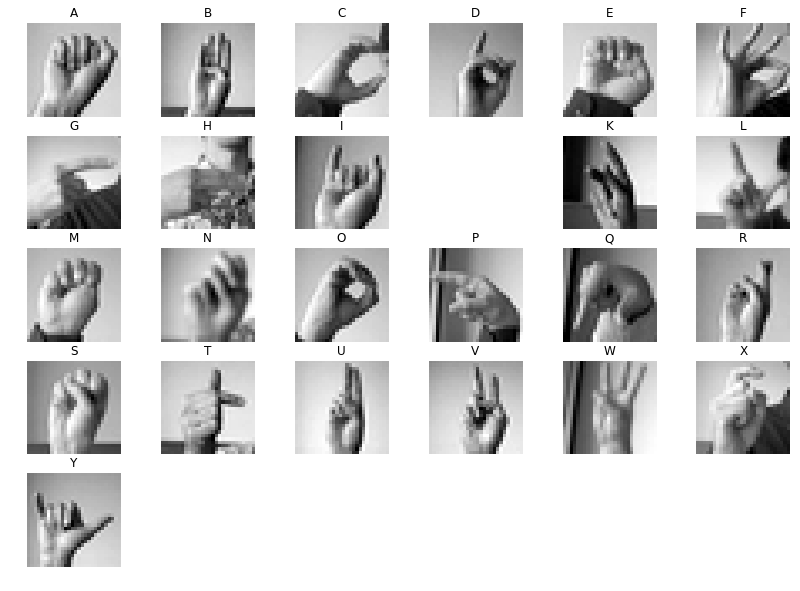

In [5]:
# Display all sign language alphabet
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 10))
for index in range(0, 26):
    # find first element of letter and get index inside y_train[]
    signIndex = next((i for i in range(1000) if y_train[i] == index), None)
    if index == 0:
        SIGN_A = signIndex
    #print(index, signIndex)
    if signIndex == None:
        continue
    nextSign = X_train[signIndex]
    nextSignImage = nextSign.reshape(28,28)
    plt.subplot(5, 6, index+1)
    plt.axis('off')
    plt.imshow(nextSignImage, cmap = matplotlib.cm.gray, interpolation="nearest")
    plt.title('%c' % (65+index))
plt.show()

# Ensemble Learning - Voting Classifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42,n_jobs=-1)
rnd_clf = RandomForestClassifier(random_state=42,n_jobs=-1)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf),('rf', rnd_clf),('svc', svm_clf)],voting='hard',n_jobs=-1)
voting_clf.fit(X_train, y_train)

/home/rem/ml/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFo...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='hard', weights=None)

In [7]:
# looking at each classifier's accuracy on test set
# !!! running for about 2 hours
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/home/rem/ml/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression 0.616982710541
RandomForestClassifier 0.660066926938
SVC 0.0200780814278


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


VotingClassifier 0.623535973229


In [13]:
#change hard voting to soft voting by highest class probability
# interrupted...
voting_clf = VotingClassifier(    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='soft',n_jobs=-1)
#voting_clf.fit(X_train, y_train)

In [14]:
#check accuracy again
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression 0.616982710541
RandomForestClassifier 0.660066926938
SVC 0.0200780814278


/home/rem/ml/env/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


VotingClassifier 0.673173452315


# Bagging and Pasting Ensembles

In [10]:
#BAGGING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print("BAGGING Accuracy: ",accuracy_score(y_test, y_pred))

BAGGING Accuracy:  0.673173452315


In [17]:
#PASTING
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("PASTING Accuracy: ",accuracy_score(y_test, y_pred))

PASTING Accuracy:  0.491076408254


In [5]:
# Out of bag Evaluation
# !!! MEMORY ALLOCATION ERROR
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, n_jobs=-1, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.99606629029320704

In [7]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
print("Out of Bag Bagging Accuracy: ",accuracy_score(y_test, y_pred))

Out of Bag Bagging Accuracy:  0.737311767987
